In [60]:
import scipy.io 
import numpy as np 
import matplotlib.pyplot as plt 
import alphashape
from shapely.geometry import Polygon, MultiPolygon

In [2]:
#file_path = r'C:\Users\josep\Desktop\Summer Research Project\white_pixels.mat'
data = scipy.io.loadmat('C:\\Users\josep\Downloads\processedEdges_sp3.mat') 

# Extract the frames 
processed_edges = data['processedEdges'] 

In [3]:
processed_edges[0,0].shape

(360, 1280)

# 1) Image

In [151]:
i = 40

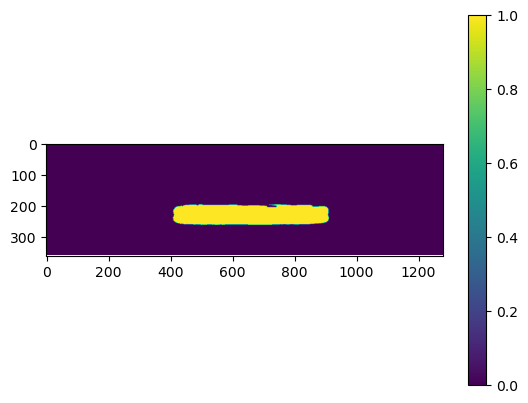

In [152]:
plt.imshow(processed_edges[0, i], cmap='viridis')  
plt.colorbar()  
plt.show()

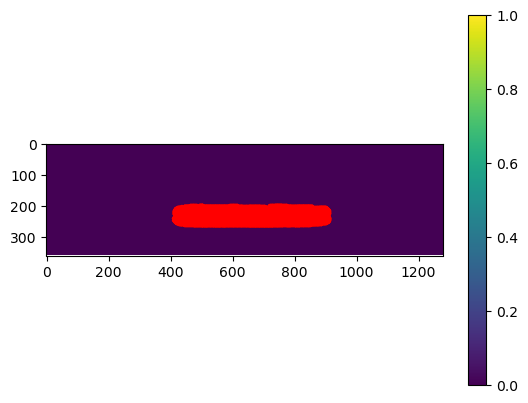

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming processed_edges[0, 30] is a 2D numpy array
# processed_edges = np.random.random((1, 31, 100, 100)) # Example data

# Extract the 2D array
data = processed_edges[0, i]

# Find indices where values are greater than 0.8
y, x = np.where(data > 0.8)

# Plot the 2D array
plt.imshow(data, cmap='viridis')
plt.colorbar()

# Overlay the points
plt.scatter(x, y, color='red', s=2)

# Show the plot
plt.show()


## 1.1) Split the Image

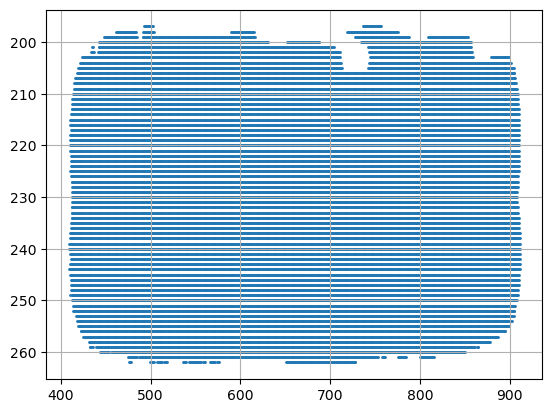

In [138]:
plt.figure()
plt.scatter(x, y, s = 1)
plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(400,-200)
plt.show()

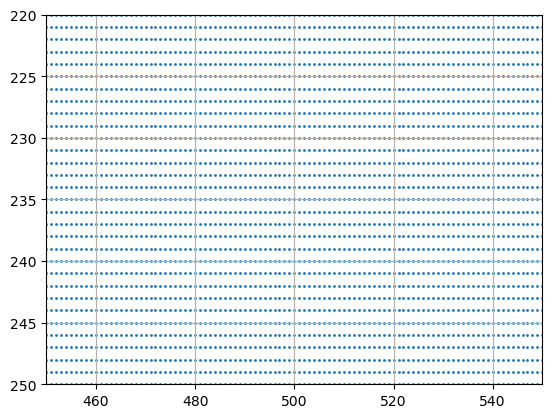

In [139]:
plt.figure()
plt.scatter(x, y, s = 1)
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(250,220)
plt.xlim(450, 550)
plt.show()

In [140]:
y_line = 230

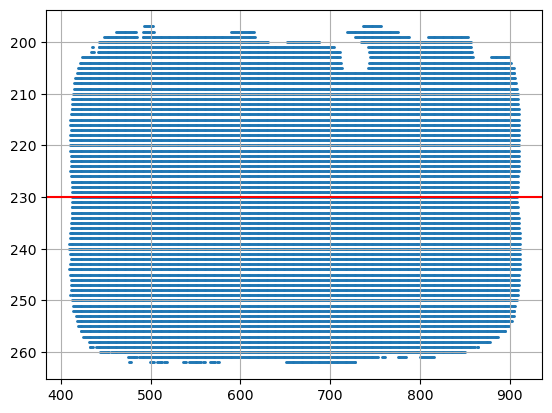

In [141]:
plt.figure()
plt.scatter(x, y, s = 1)
plt.grid(True)
plt.gca().invert_yaxis()

# Draw the horizontal line at 230
plt.axhline(y=y_line, color='r', linestyle='-')


#plt.ylim(400,-200)
plt.show()

## 1.2) Draw the Edge line 

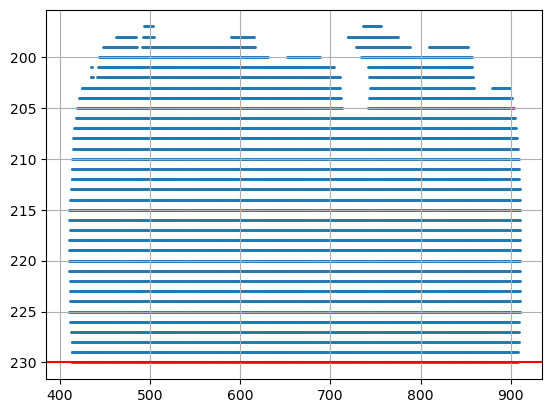

In [142]:
x_filtered = x[y <= y_line]
y_filtered = y[y <= y_line]

plt.figure()
plt.scatter(x_filtered, y_filtered, s=1)
plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(400, -200)

plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()

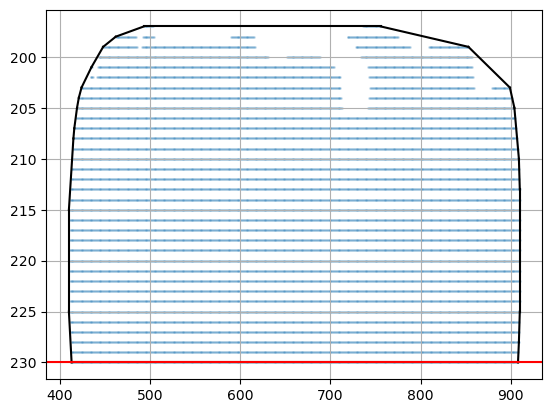

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Assuming x, y, and y_line are already defined
x_filtered = x[y <= y_line]
y_filtered = y[y <= y_line]

# Find the convex hull
points = np.vstack((x_filtered, y_filtered)).T
hull = ConvexHull(points)

# Plot the points
plt.figure()
plt.scatter(x_filtered, y_filtered, s=1, alpha=0.2)  # Plot all points with low opacity

# Plot the convex hull
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', lw=1.5)  # Edge of the shape

plt.grid(True)
plt.gca().invert_yaxis()
plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()


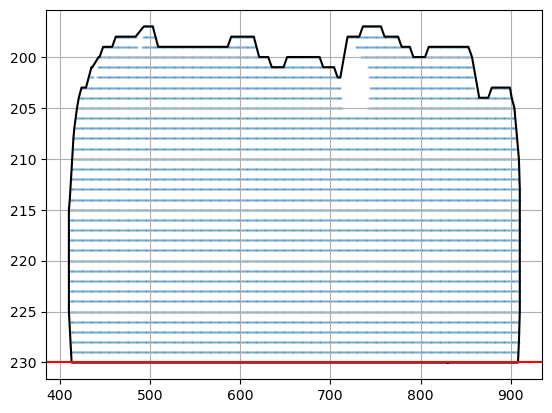

In [144]:
x_filtered = x[y <= y_line]
y_filtered = y[y <= y_line]

# Create points array
points = np.vstack((x_filtered, y_filtered)).T

# Compute the alpha shape with a suitable alpha value
alpha = 0.1  #
alpha_shape = alphashape.alphashape(points, alpha)

# Plot the alpha shape
plt.figure()
plt.scatter(x_filtered, y_filtered, s=1, alpha=0.2)  
# Check if the alpha shape is a Polygon or MultiPolygon and plot accordingly
if isinstance(alpha_shape, Polygon):
    x_edge, y_edge = alpha_shape.exterior.xy
    plt.plot(x_edge, y_edge, 'k-', lw=1.5)
elif isinstance(alpha_shape, MultiPolygon):
    for poly in alpha_shape:
        x_edge, y_edge = poly.exterior.xy
        plt.plot(x_edge, y_edge, 'k-', lw=1.5)

plt.grid(True)
plt.gca().invert_yaxis()
plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()


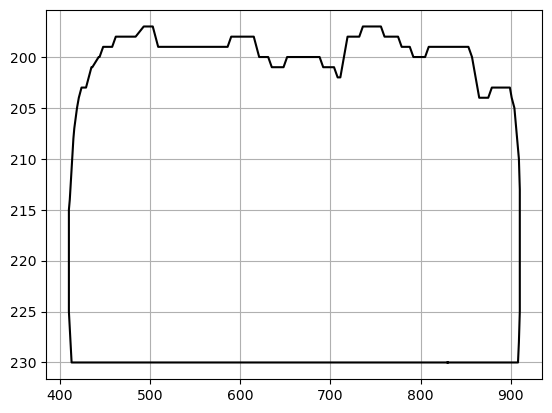

In [145]:
plt.plot(x_edge, y_edge, 'k-', lw=1.5)
plt.grid(True)
plt.gca().invert_yaxis()

In [156]:
def remove_horizontal_line(x, y, horizontal_value):
    """
    Remove interior points of a horizontal line from the data while retaining edge points
    """
    
    filtered_data = []
    for i in range(len(x)):
        if y[i] != horizontal_value:
            filtered_data.append((x[i], y[i]))
        else:
            if i == 0 or i == len(x) - 1 or y[i-1] != horizontal_value or y[i+1] != horizontal_value:
                filtered_data.append((x[i], y[i]))
    
    if filtered_data:
        x_filtered, y_filtered = zip(*filtered_data)
    else:
        x_filtered, y_filtered = [], []

    return x_filtered, y_filtered

In [147]:
x_main_edge, y_main_edge = remove_horizontal_line(x_edge, y_edge,y_line)

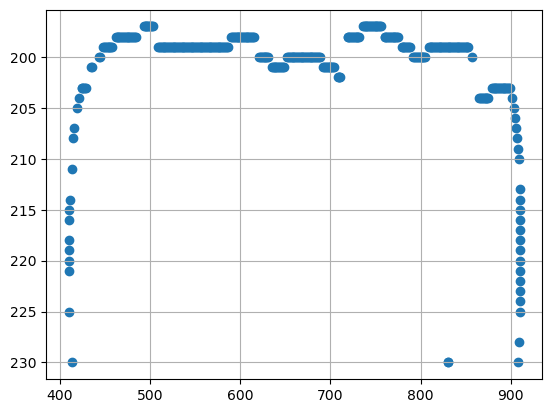

In [148]:
plt.scatter(x_main_edge, y_main_edge)
plt.grid(True)
plt.gca().invert_yaxis()

## 1.3) Left Points

In [325]:
def filter_lowest_x_points(x, y, num_points):
    """
    Filter the points to only consider those with the lowest num_points values of x
    """
    
    # Combine x and y into a list of tuples
    data = list(zip(x, y))
    
    # Sort the data by x values
    data.sort(key=lambda point: point[0])
    
    # Select the first num_points points
    filtered_data = data[:num_points]
    
    # Separate the filtered data into x and y components
    x_filtered, y_filtered = zip(*filtered_data)

    return x_filtered, y_filtered

In [326]:
x_left, y_left = filter_lowest_x_points(x_main_edge, y_main_edge, num_points = 20)

(400.0, 900.0)

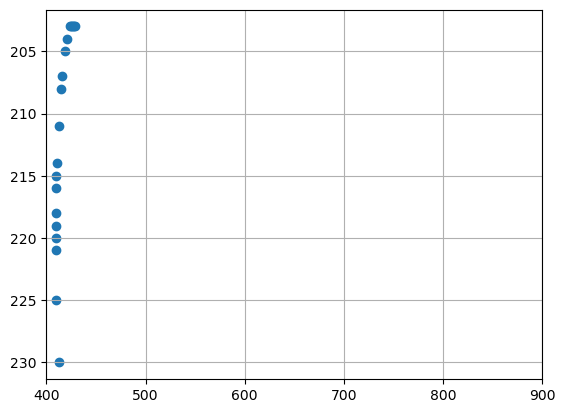

In [295]:
plt.scatter(x_left, y_left)
plt.grid(True)
plt.gca().invert_yaxis()

plt.xlim(400, 900)

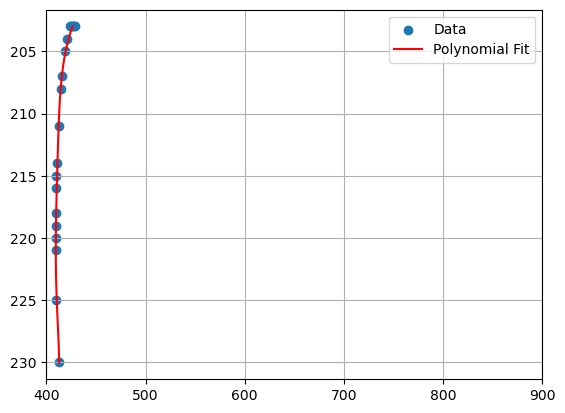

In [327]:
# Perform polynomial regression
degree = 5  
coefficients1 = np.polyfit(y_left, x_left, degree)
poly_function1 = np.poly1d(coefficients1)

# Generate points for the curve
y_curve1 = np.linspace(min(y_left), max(y_left), 100)  
x_curve1 = poly_function1(y_curve1)

# Plot the data and the curve
plt.scatter(x_left, y_left, label='Data')
plt.plot(x_curve1, y_curve1, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
plt.xlim(400, 900)  # Set x-axis limits
plt.legend()
plt.show()


In [328]:
contact_point_ind = np.where(np.array(y_left)==230)

In [329]:
bottom_ind = np.where( np.array(y_left) == 230)

In [330]:
np.array(x_left)[bottom_ind][0]

413.0

In [335]:
def lowest_indices(array):
    if len(array) < 2:
        raise ValueError("Array must have at least two elements")

    # Find the indices of the two lowest values
    sorted_indices = sorted(range(len(array)), key=lambda i: array[i])
    lowest_indices = sorted_indices[len(array)-2:]

    # Return the indices of the two lowest values
    return lowest_indices

In [336]:
lowest_indices1 = lowest_indices(y_curve1)
lowest_indices1

[98, 99]

In [337]:
y_curve1[lowest_indices1]

array([229.72727273, 230.        ])

In [338]:
starting_xvals1 = x_curve1[lowest_indices1]
starting_xvals1

array([412.85943408, 412.92128149])

In [339]:
x_curve1[lowest_indices1[1]]

412.92128149420023

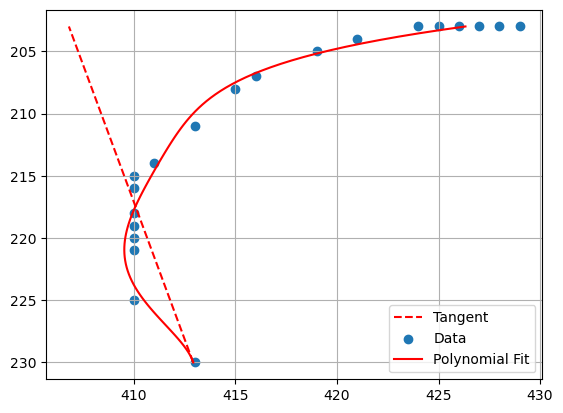

In [341]:
dx1 = starting_xvals1[1] - starting_xvals1[0]
dy_dx1 = np.gradient(y_curve1, dx1)
slope_at_min_x1 = dy_dx1[lowest_indices1[1]]

# tangent line
#x_tangent = np.linspace(min(x_curve), max(x_curve), 100)
#y_tangent = slope_at_min_x * (x_tangent - 413) + 230

y_tangent1 = np.linspace(max(y_curve1), min(y_curve1), 100)
x_tangent1 = ( 1/slope_at_min_x1 ) * (y_tangent1 - 230) + starting_xvals1[1]

plt.plot(x_tangent1, y_tangent1, color='red', linestyle='--', label='Tangent')
plt.grid(True)

# Plot the data and the curve
plt.scatter(x_left, y_left, label='Data')
plt.plot(x_curve1, y_curve1, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
#plt.xlim(400, 440)  
#plt.ylim(230,225)
plt.legend()
plt.show()

In [355]:
angle_tangent_degrees_left = np.degrees(-np.arctan(slope_at_min_x1))

In [356]:
angle_tangent_degrees_left

-77.22291590879267

## 1.4) Right Points

In [344]:
def filter_highest_x_points(x, y, num_points):
    """
    Filter the points to only consider those with the highest num_points values of x
    """
    
    # Combine x and y into a list of tuples
    data = list(zip(x, y))
    
    # Sort the data by x values
    data.sort(key=lambda point: point[0])
    
    # Select the last num_points points
    filtered_data = data[-num_points:]
    
    # Separate the filtered data into x and y components
    x_filtered, y_filtered = zip(*filtered_data)

    return x_filtered, y_filtered

In [345]:
x_right, y_right = filter_highest_x_points(x_main_edge, y_main_edge, num_points = 20)

(400.0, 950.0)

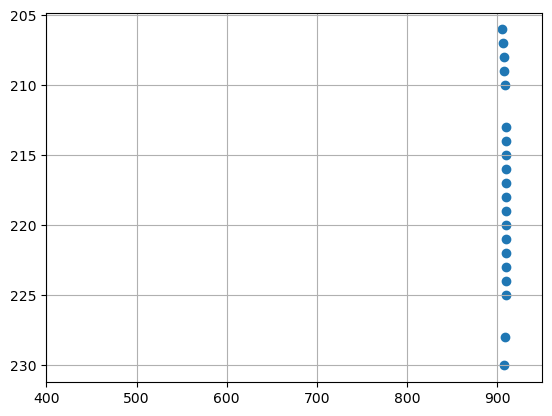

In [346]:
plt.scatter(x_right, y_right)
plt.grid(True)
plt.gca().invert_yaxis()

plt.xlim(400, 950)

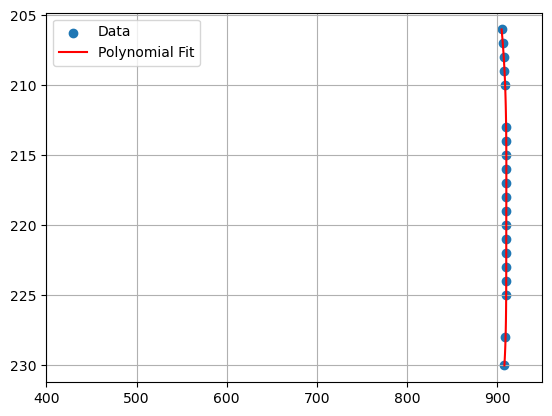

In [348]:
# Perform polynomial regression
degree = 5  
coefficients2 = np.polyfit(y_right, x_right, degree)
poly_function2 = np.poly1d(coefficients2)

# Generate points for the curve
y_curve2 = np.linspace(min(y_right), max(y_right), 100)  
x_curve2 = poly_function2(y_curve2)

# Plot the data and the curve
plt.scatter(x_right, y_right, label='Data')
plt.plot(x_curve2, y_curve2, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
plt.xlim(400, 950)  # Set x-axis limits
plt.legend()
plt.show()

In [349]:
def lowest_indices(array):
    if len(array) < 2:
        raise ValueError("Array must have at least two elements")

    # Find the indices of the two lowest values
    sorted_indices = sorted(range(len(array)), key=lambda i: array[i])
    lowest_indices = sorted_indices[len(array)-2:]

    # Return the indices of the two lowest values
    return lowest_indices

In [350]:
lowest_indices2 = lowest_indices(y_curve2)
lowest_indices2

[98, 99]

In [351]:
y_curve2[lowest_indices2]

array([229.75757576, 230.        ])

In [352]:
starting_xvals2 = x_curve2[lowest_indices2]
starting_xvals2

array([908.12628827, 907.9116732 ])

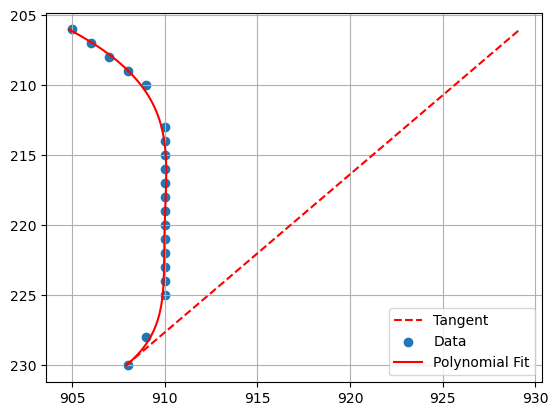

In [353]:
dx2 = starting_xvals2[1] - starting_xvals2[0]
dy_dx2 = np.gradient(y_curve2, dx2)
slope_at_min_x2 = dy_dx2[lowest_indices2[1]]

# tangent line
#x_tangent = np.linspace(min(x_curve), max(x_curve), 100)
#y_tangent = slope_at_min_x * (x_tangent - 413) + 230

y_tangent2 = np.linspace(max(y_curve2), min(y_curve2), 100)
x_tangent2 = ( 1/slope_at_min_x2 ) * (y_tangent2 - 230) + starting_xvals2[1]

plt.plot(x_tangent2, y_tangent2, color='red', linestyle='--', label='Tangent')
plt.grid(True)

# Plot the data and the curve
plt.scatter(x_right, y_right, label='Data')
plt.plot(x_curve2, y_curve2, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
#plt.xlim(400, 440)  
#plt.ylim(230,225)
plt.legend()
plt.show()

In [358]:
angle_tangent_degrees_right = np.degrees(-np.arctan(slope_at_min_x2))

In [359]:
angle_tangent_degrees_right

48.48194675630359